In [1]:
import numpy as np
from carta.client import Session, Colormap, CoordinateSystem, Color, Overlay, Scaling
from IPython.display import Image

In [2]:
# These host, port and session ID values should match your backend gRPC server
# and the currently running frontend session
session = Session("localhost", 50051, 1)

# Optionally close any existing images open in the session
for img in session.image_list():
    img.close()

# Optionally open / append new images (adjust the paths as necessary)
img = session.open_image("/home/adrianna/data/hdf5/orion_12co_hera.hdf5")
# session.append_image("/home/adrianna/data/fits/orion_12co_hera.fits")

# This populates the class with static colormap names
# At the moment this can only be done if at least one image is open in the session
Colormap.fetch(session)

In [3]:
# change the channel
img.set_channel_stokes(10, 0, True)
# various commands for handling spatial and spectral matching are also available

# pan and zoom
y, x = img.shape()[-2:]
img.set_center(x/2, y/2)
img.set_zoom(4)

# change colormap
img.set_colormap(Colormap.VIRIDIS)
# more advanced options
#img.set_colormap(Colormap.VIRIDIS, invert=True)
#img.set_scaling(Scaling.LOG, alpha=100, min=-0.5, max=30)

# change some overlay properties
session.set_view_area(500, 500)
#session.set_coordinate_system(CoordinateSystem.FK5)
#session.set_color(Color.RED)
#session.set_color(Color.VIOLET, Overlay.TICKS)
#session.show(Overlay.TITLE)

# add contours
levels = np.arange(5, 5 * 5, 4)
img.configure_contours(levels)
img.apply_contours()
# use a constant colour
img.set_contour_color("red")
# or use a colourmap
#img.set_contour_colormap(Colormap.REDS)

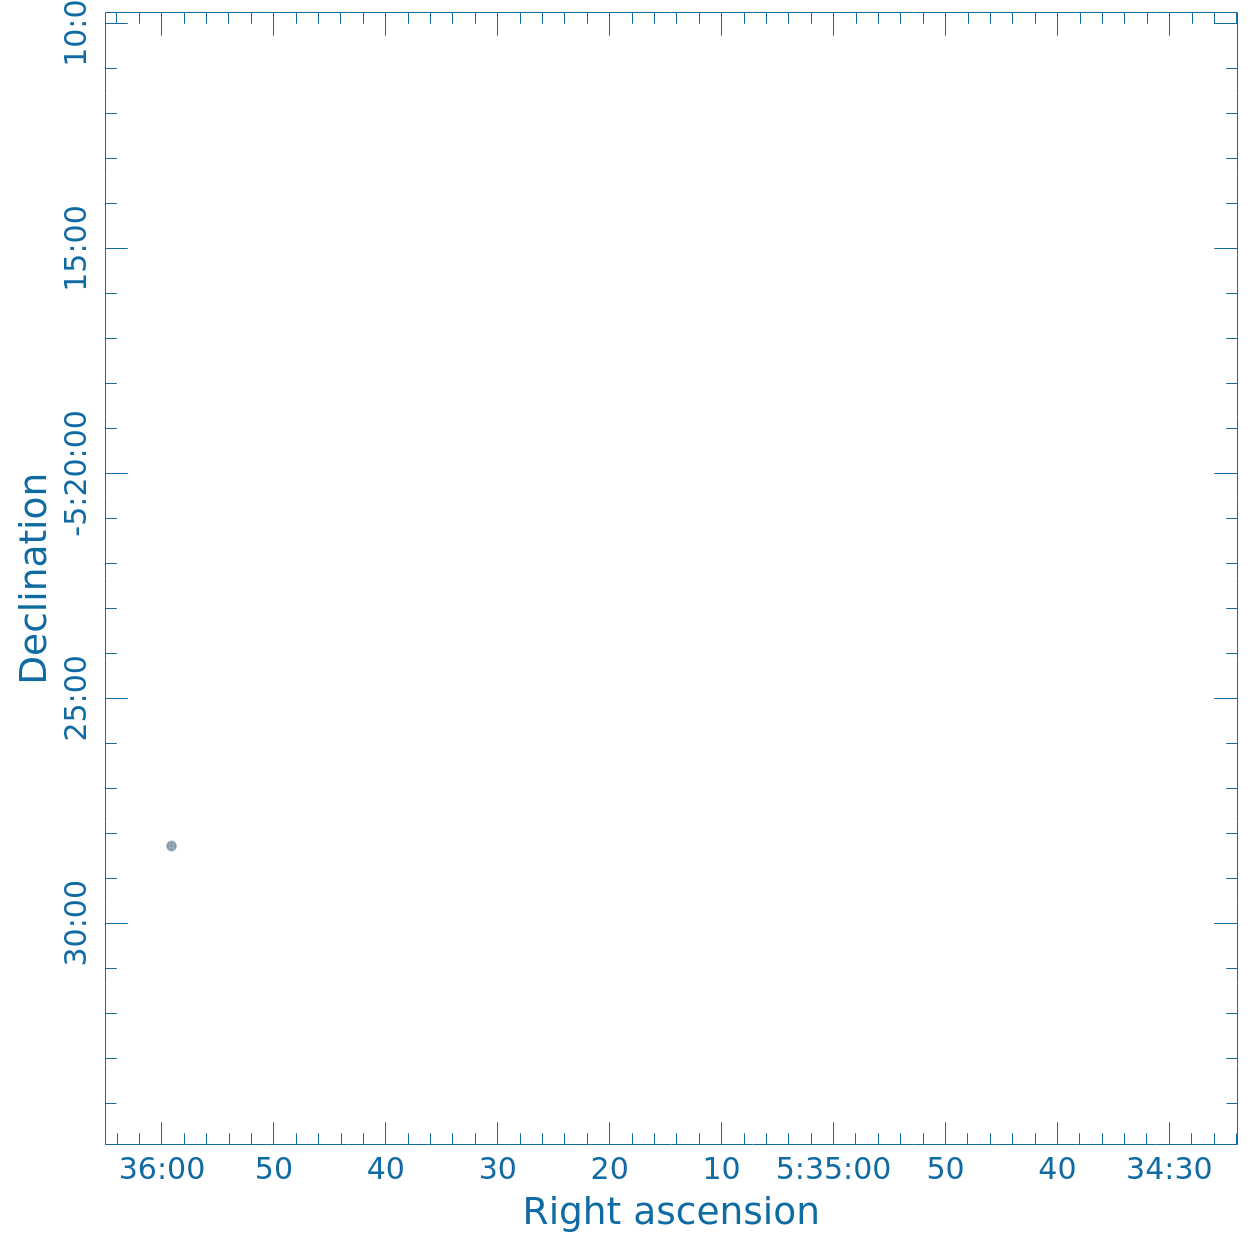

In [4]:
# You can retrieve the encoded data uri, the raw decoded data as below,
# or save the data to a png file. The parameter is the desired background colour;
# it can be any HTML/CSS colour string, including an rgba value.

# Known issue: we need to wait for the commands above to complete before getting 
# the rendered view, and this behaviour is not yet handled consistently. For now,
# if the view is out of date, re-run this cell.

picture = Image(data=session.rendered_view_data("white"))
# picture = Image(data=session.rendered_view_data("#000000"))
# picture = Image(data=session.rendered_view_data("rgba(255, 0, 0, .5)"))
display(picture)

In [5]:
img.set_contour_color("red")